In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
figures = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) =  figures.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
test_images.shape

(10000, 28, 28)

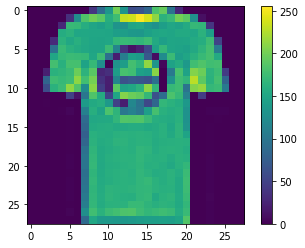

In [12]:
plt.figure()
plt.imshow(train_images[48])
plt.colorbar()
plt.show()

In [13]:
train_images = train_images/255
test_images = test_images/255

In [25]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

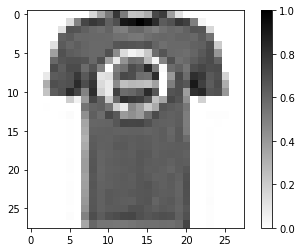

In [16]:
plt.figure()
plt.imshow(train_images[48], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

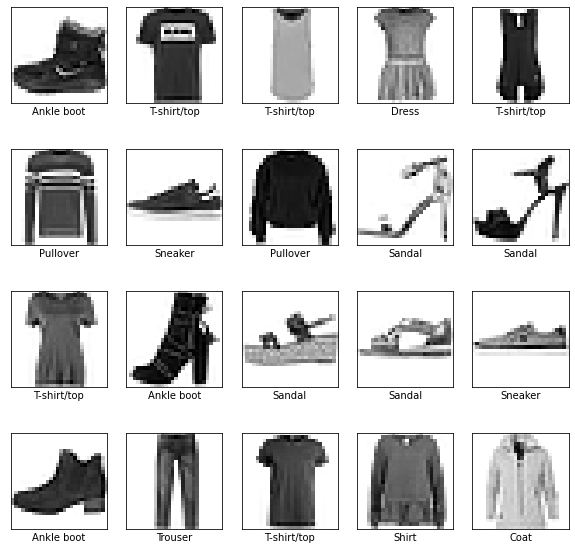

In [24]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [28]:
model = Sequential()

In [33]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [34]:
model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='sparse_categorical_crossentropy'
)

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0942 - accuracy: 0.9657
Epoch 2/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0958 - accuracy: 0.9645
Epoch 3/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0976 - accuracy: 0.9637
Epoch 4/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0957 - accuracy: 0.9642
Epoch 5/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0938 - accuracy: 0.9644
Epoch 6/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0926 - accuracy: 0.9656
Epoch 7/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0897 - accuracy: 0.9657
Epoch 8/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0885 - accuracy: 0.9667
Epoch 9/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0876 - accuracy: 0.9675
Epoch 10/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0870 - accuracy: 0.9683

KeyboardInterrupt: ignored

In [37]:
train_loss, train_acc = model.evaluate(train_images, train_labels)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2314 - accuracy: 0.9122


In [38]:
print('Acc Train:', train_acc)
print('Loss Train:', train_loss)

Acc Train: 0.9121833443641663
Loss Train: 0.23136675357818604


In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8804


In [40]:
print('Acc Test:', test_acc)
print('Loss Test:', test_loss)

Acc Test: 0.8804000020027161
Loss Test: 0.33982202410697937
